Chronic Kidney Disease Severity prediction project:



Project Introduction: Chronic Kidney Disease Severity Classification
Chronic Kidney Disease (CKD) is a progressive condition characterized by gradual loss of kidney function over time. Early detection and risk stratification are critical for preventing severe outcomes, including end-stage renal disease and cardiovascular complications. This project aims to develop a machine learning pipeline that classifies CKD severity into five distinct categories: No_Disease, Low_Risk, Moderate_Risk, Severe_Disease, and High_Risk. Using a comprehensive dataset of 44 features—including demographic information, vital signs, blood and urine test results, comorbid conditions, lifestyle factors, and advanced biomarkers—this study leverages data-driven methods to support clinical decision-making.

The pipeline involves thorough data preprocessing, exploratory data analysis (EDA), feature selection, and model training using algorithms like Logistic Regression, Random Forest, and XGBoost. Due to the imbalance in the target classes, careful evaluation is performed using metrics such as accuracy, F1-macro score, and confusion matrices. Feature importance and explainability techniques are applied to understand model decisions, and the top predictive variables are identified. The final model is tuned for optimal performance and integrated into a real-time prediction system, making it a practical tool for healthcare professionals to assess CKD severity and guide patient care.

🔹 Step 1: Imports & Setup

In [32]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

# Warnings
import warnings
warnings.filterwarnings("ignore")


In [4]:
df = pd.read_csv('kidney_disease_dataset.csv')

<IPython.core.display.Javascript object>

🔹 Step 2: Initial Data Inspection
Let’s quickly check out the structure of your dataset.

In [34]:
# Overview
print("Shape of the dataset:", df.shape)
display(df.head())

# Data types and nulls
print("\nData Types and Missing Values:")
display(df.info())

# Target distribution
print("\nTarget Distribution:")
display(df['Target'].value_counts())


Shape of the dataset: (20538, 43)


,Age of the patient,Blood pressure (mm/Hg),Specific gravity of urine,Albumin in urine,Sugar in urine,Red blood cells in urine,Pus cells in urine,Pus cell clumps in urine,Bacteria in urine,Random blood glucose level (mg/dl),...,Smoking status,Body Mass Index (BMI),Physical activity level,Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,Urinary sediment microscopy results,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level,Target
0,54,167,1.023,1,4,normal,abnormal,not present,not present,96,...,yes,25.3,low,4,16,0.67,normal,4.88,10.23,No_Disease
1,42,127,1.023,3,2,normal,normal,not present,present,73,...,no,20.6,moderate,3,13,0.55,abnormal,4.49,13.11,Low_Risk
2,38,148,1.016,0,0,abnormal,normal,not present,not present,77,...,no,38.4,high,11,23,2.37,abnormal,4.57,13.27,No_Disease
3,7,98,1.017,4,0,abnormal,normal,not present,present,225,...,no,24.7,high,24,3,2.54,abnormal,8.57,12.36,No_Disease
4,67,174,1.015,1,1,normal,abnormal,not present,not present,376,...,yes,17.6,high,22,24,1.90,normal,6.75,1.46,No_Disease



Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20538 entries, 0 to 20537
Data columns (total 43 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Age of the patient                           20538 non-null  int64  
 1   Blood pressure (mm/Hg)                       20538 non-null  int64  
 2   Specific gravity of urine                    20538 non-null  float64
 3   Albumin in urine                             20538 non-null  int64  
 4   Sugar in urine                               20538 non-null  int64  
 5   Red blood cells in urine                     20538 non-null  object 
 6   Pus cells in urine                           20538 non-null  object 
 7   Pus cell clumps in urine                     20538 non-null  object 
 8   Bacteria in urine                            20538 non-null  object 
 9   Random blood glucose level (mg/dl)      

None


Target Distribution:


Target
No_Disease        16432
Low_Risk           2054
Moderate_Risk       821
High_Risk           821
Severe_Disease      410
Name: count, dtype: int64

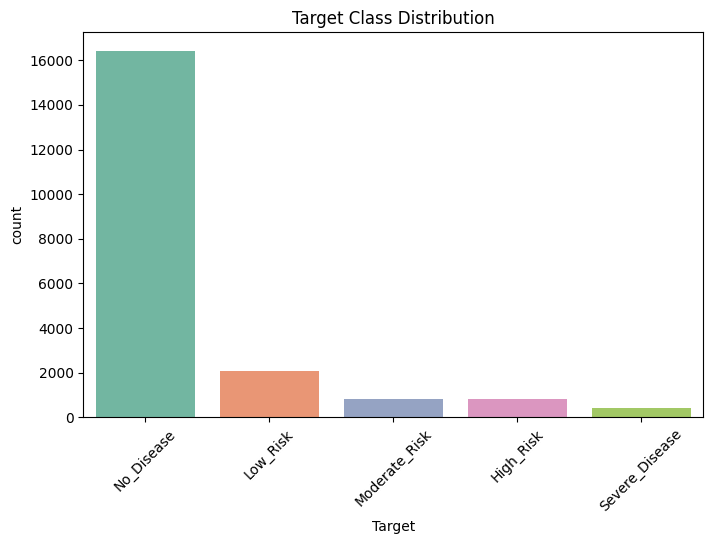

In [35]:
#🔹 3.1 Target Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Target', order=df['Target'].value_counts().index, palette='Set2')
plt.title("Target Class Distribution")
plt.xticks(rotation=45)
plt.show()


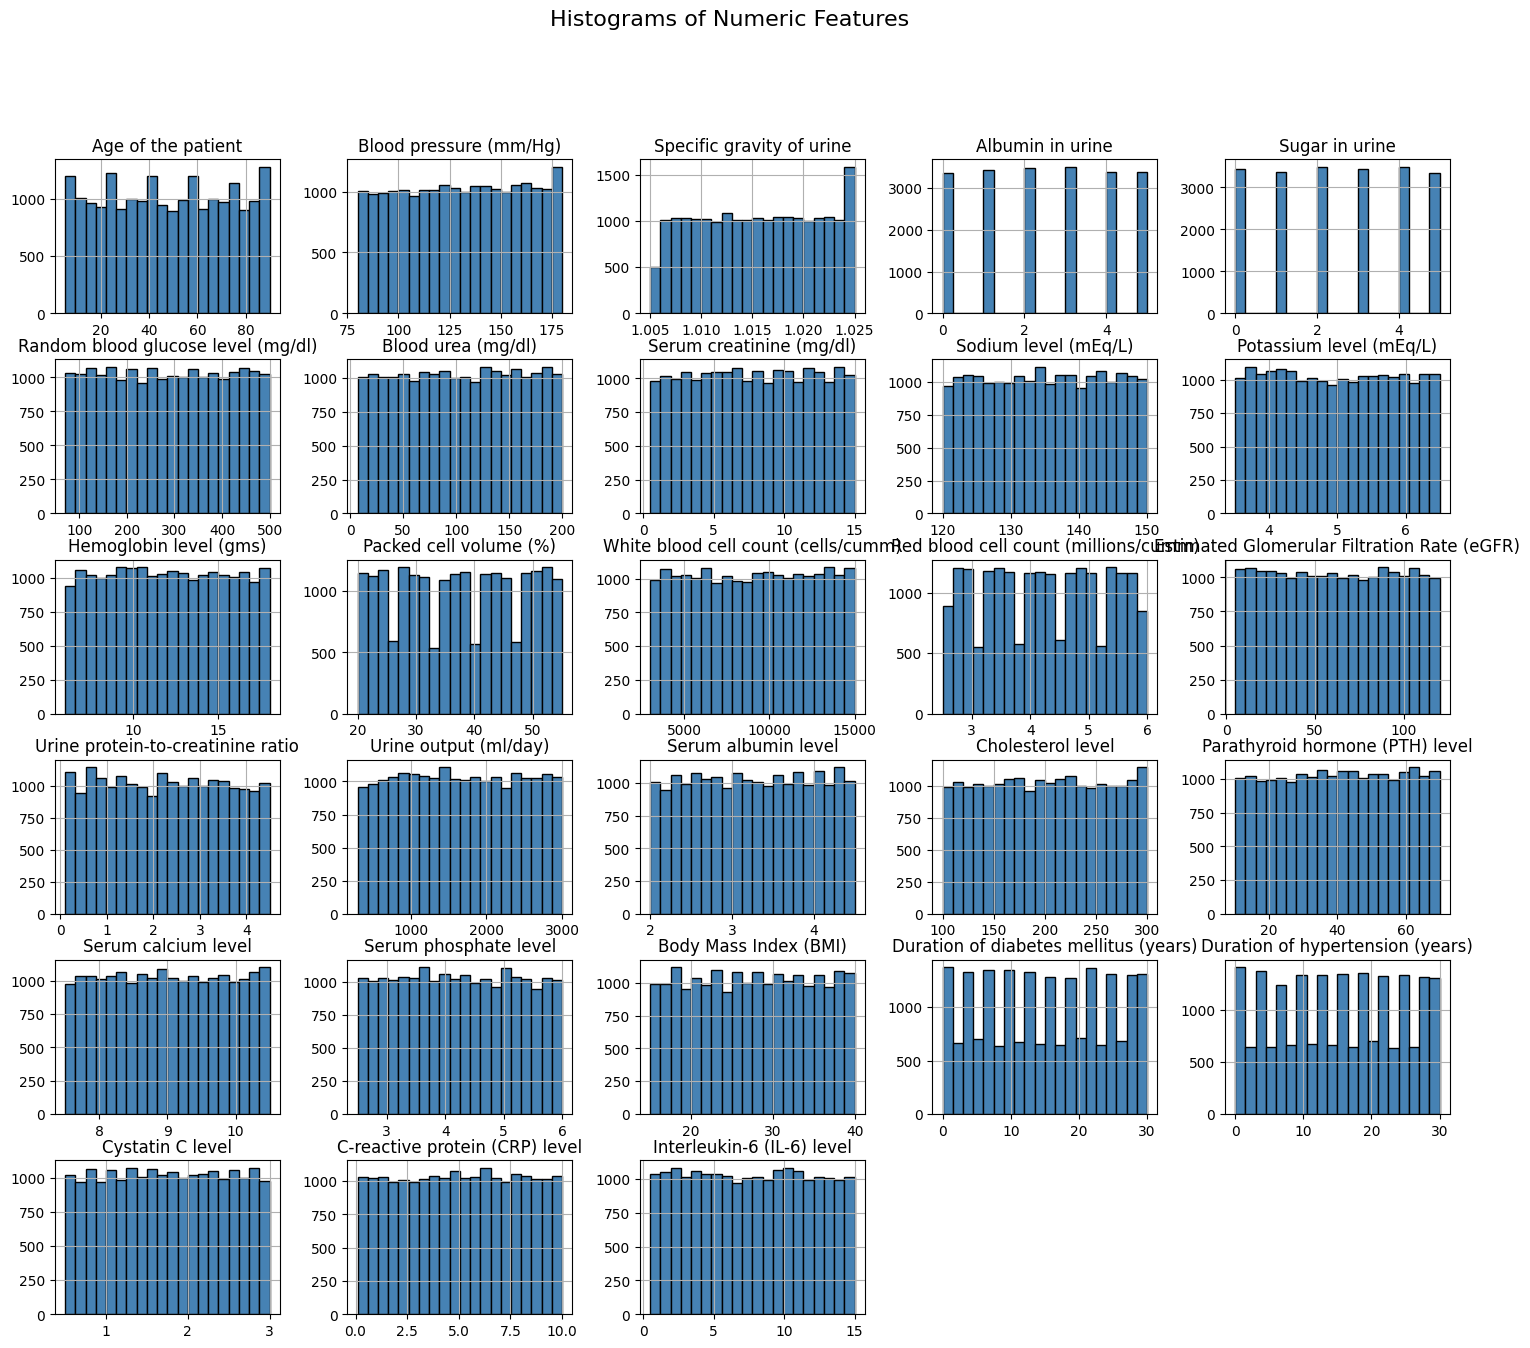

In [36]:
# 🔹 3.2 Numerical Feature Distributions
# Select numeric columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Plot histograms
df[num_cols].hist(bins=20, figsize=(18, 15), color='steelblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()


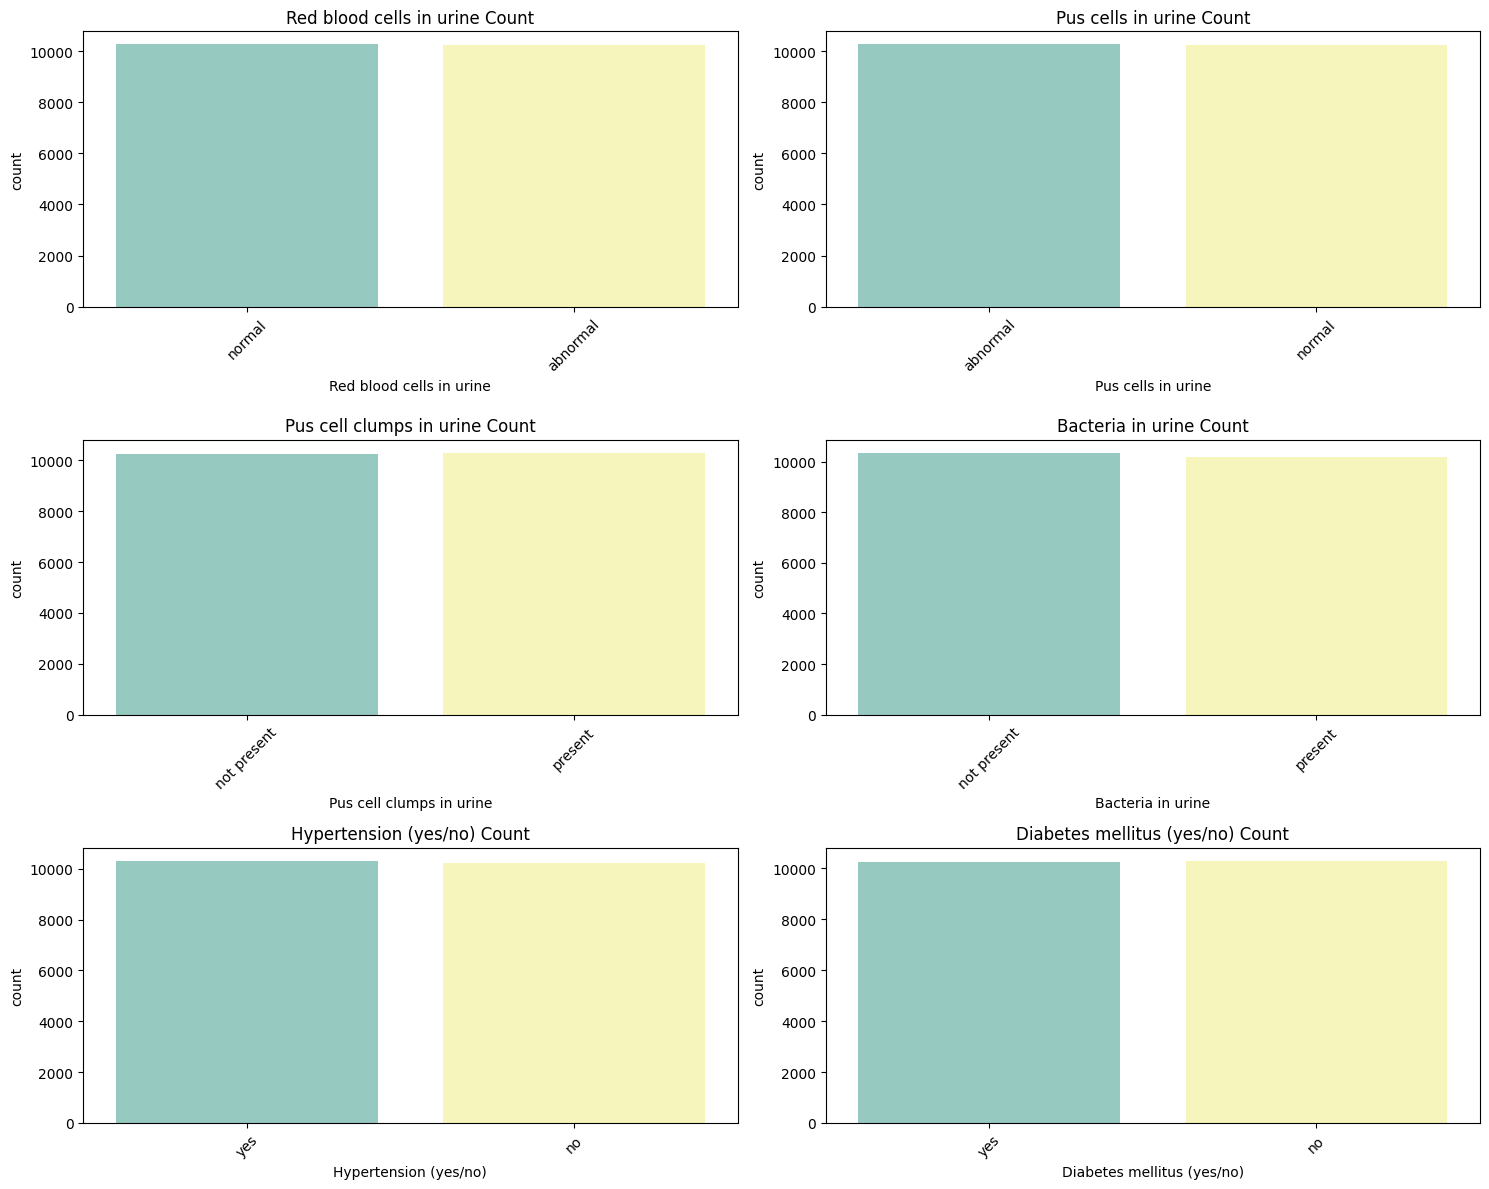

In [37]:
# 🔹 3.3 Categorical Feature Counts (Top 6)
# Select top categorical features to plot
cat_cols = df.select_dtypes(include='object').columns.drop('Target')  # exclude target
top_cat_cols = cat_cols[:6]  # just take top 6 for now to avoid clutter

plt.figure(figsize=(15, 12))
for i, col in enumerate(top_cat_cols):
    plt.subplot(3, 2, i+1)
    sns.countplot(data=df, x=col, palette='Set3')
    plt.title(f'{col} Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


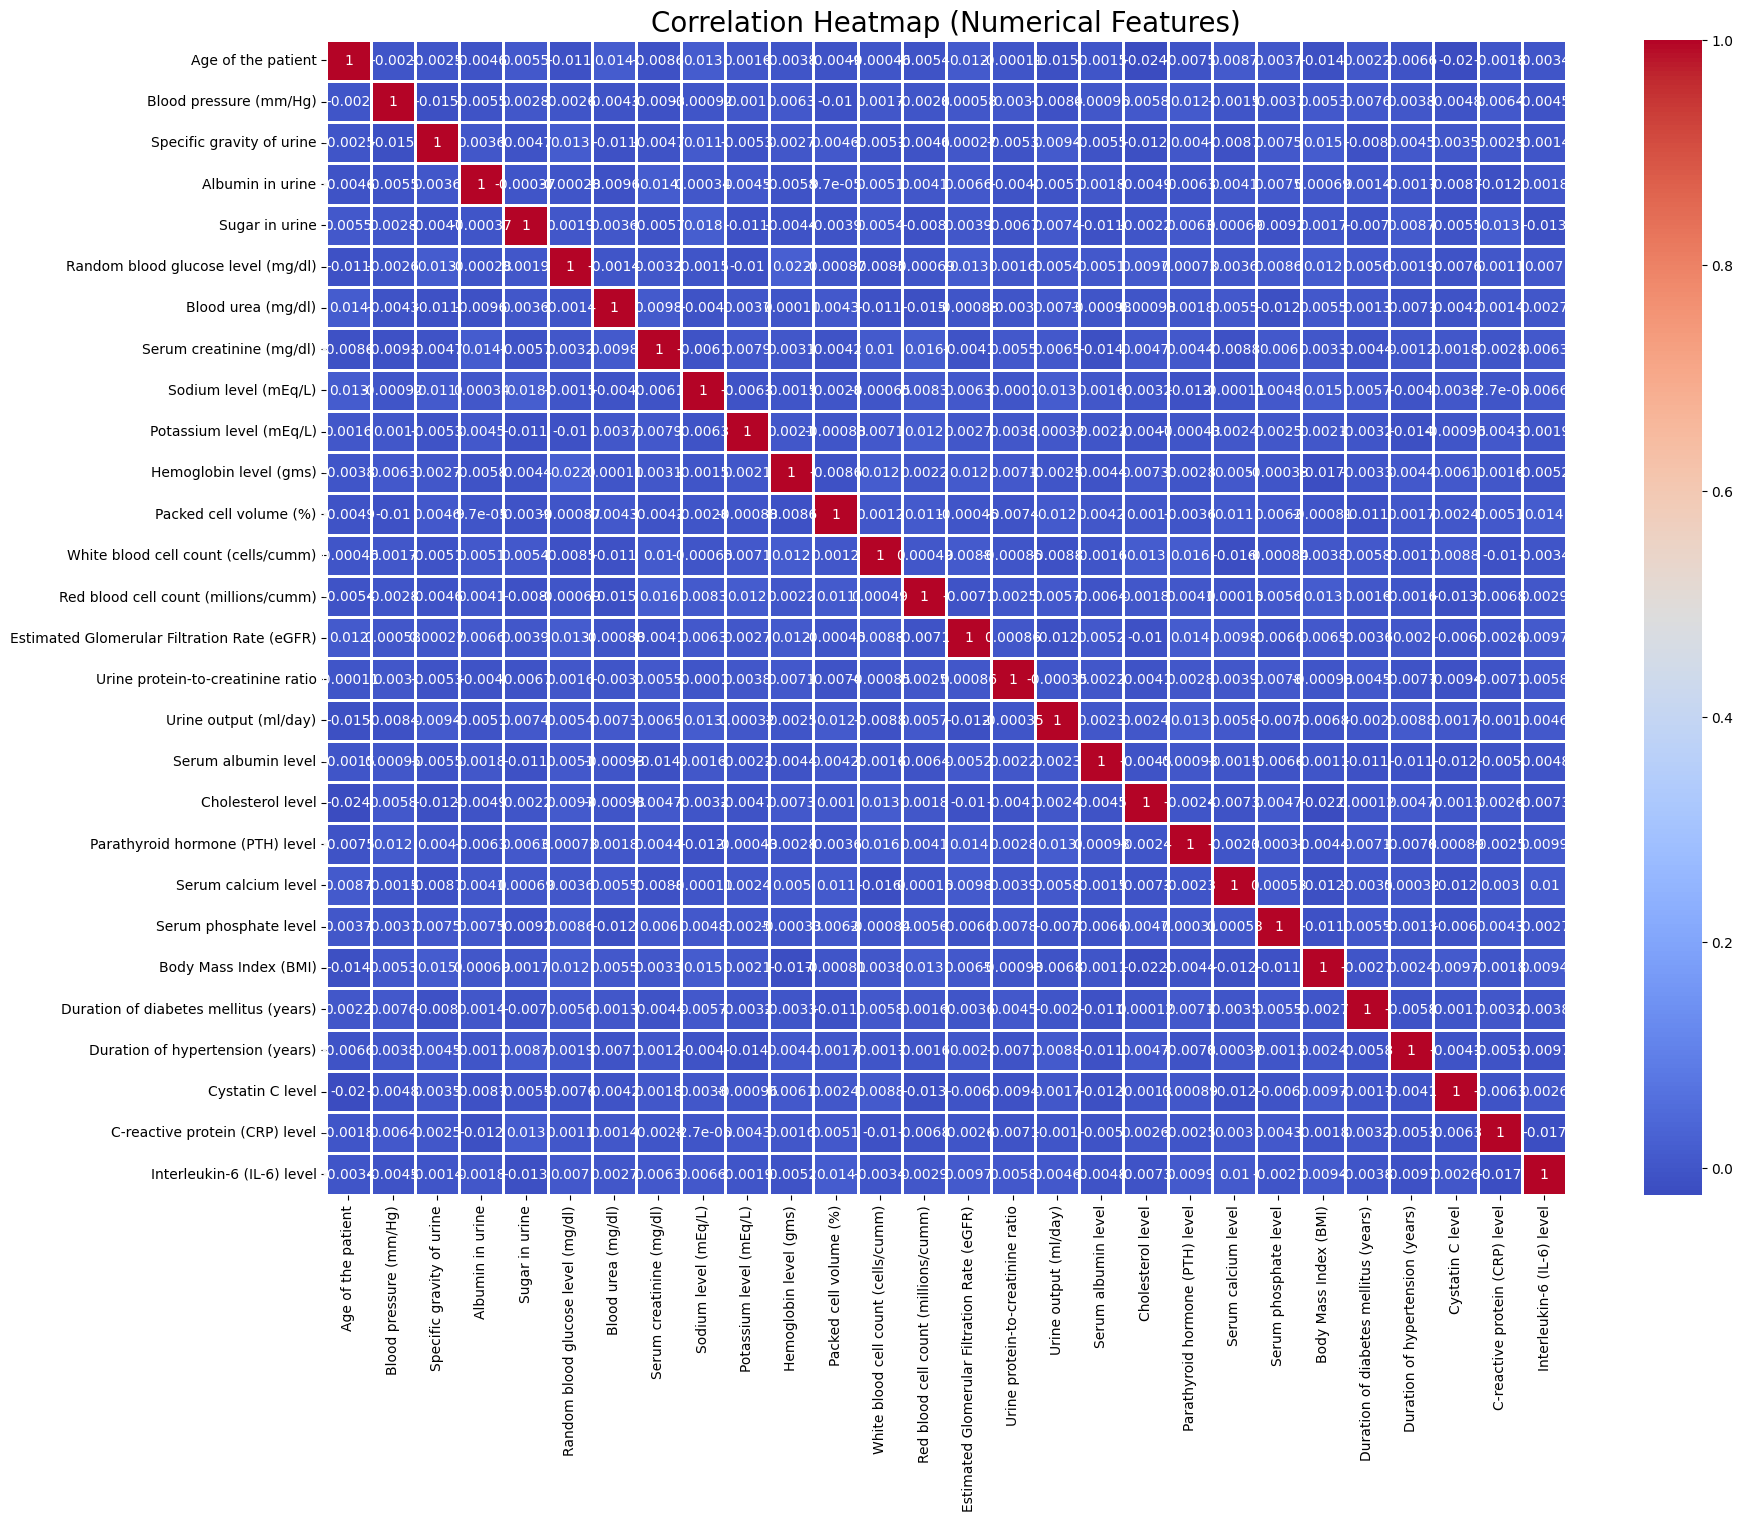

In [38]:
# 🔹 3.4 Correlation Heatmap (Numerical Features)
plt.figure(figsize=(20, 15))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=1)
plt.title("Correlation Heatmap (Numerical Features)", fontsize=20)
plt.show()


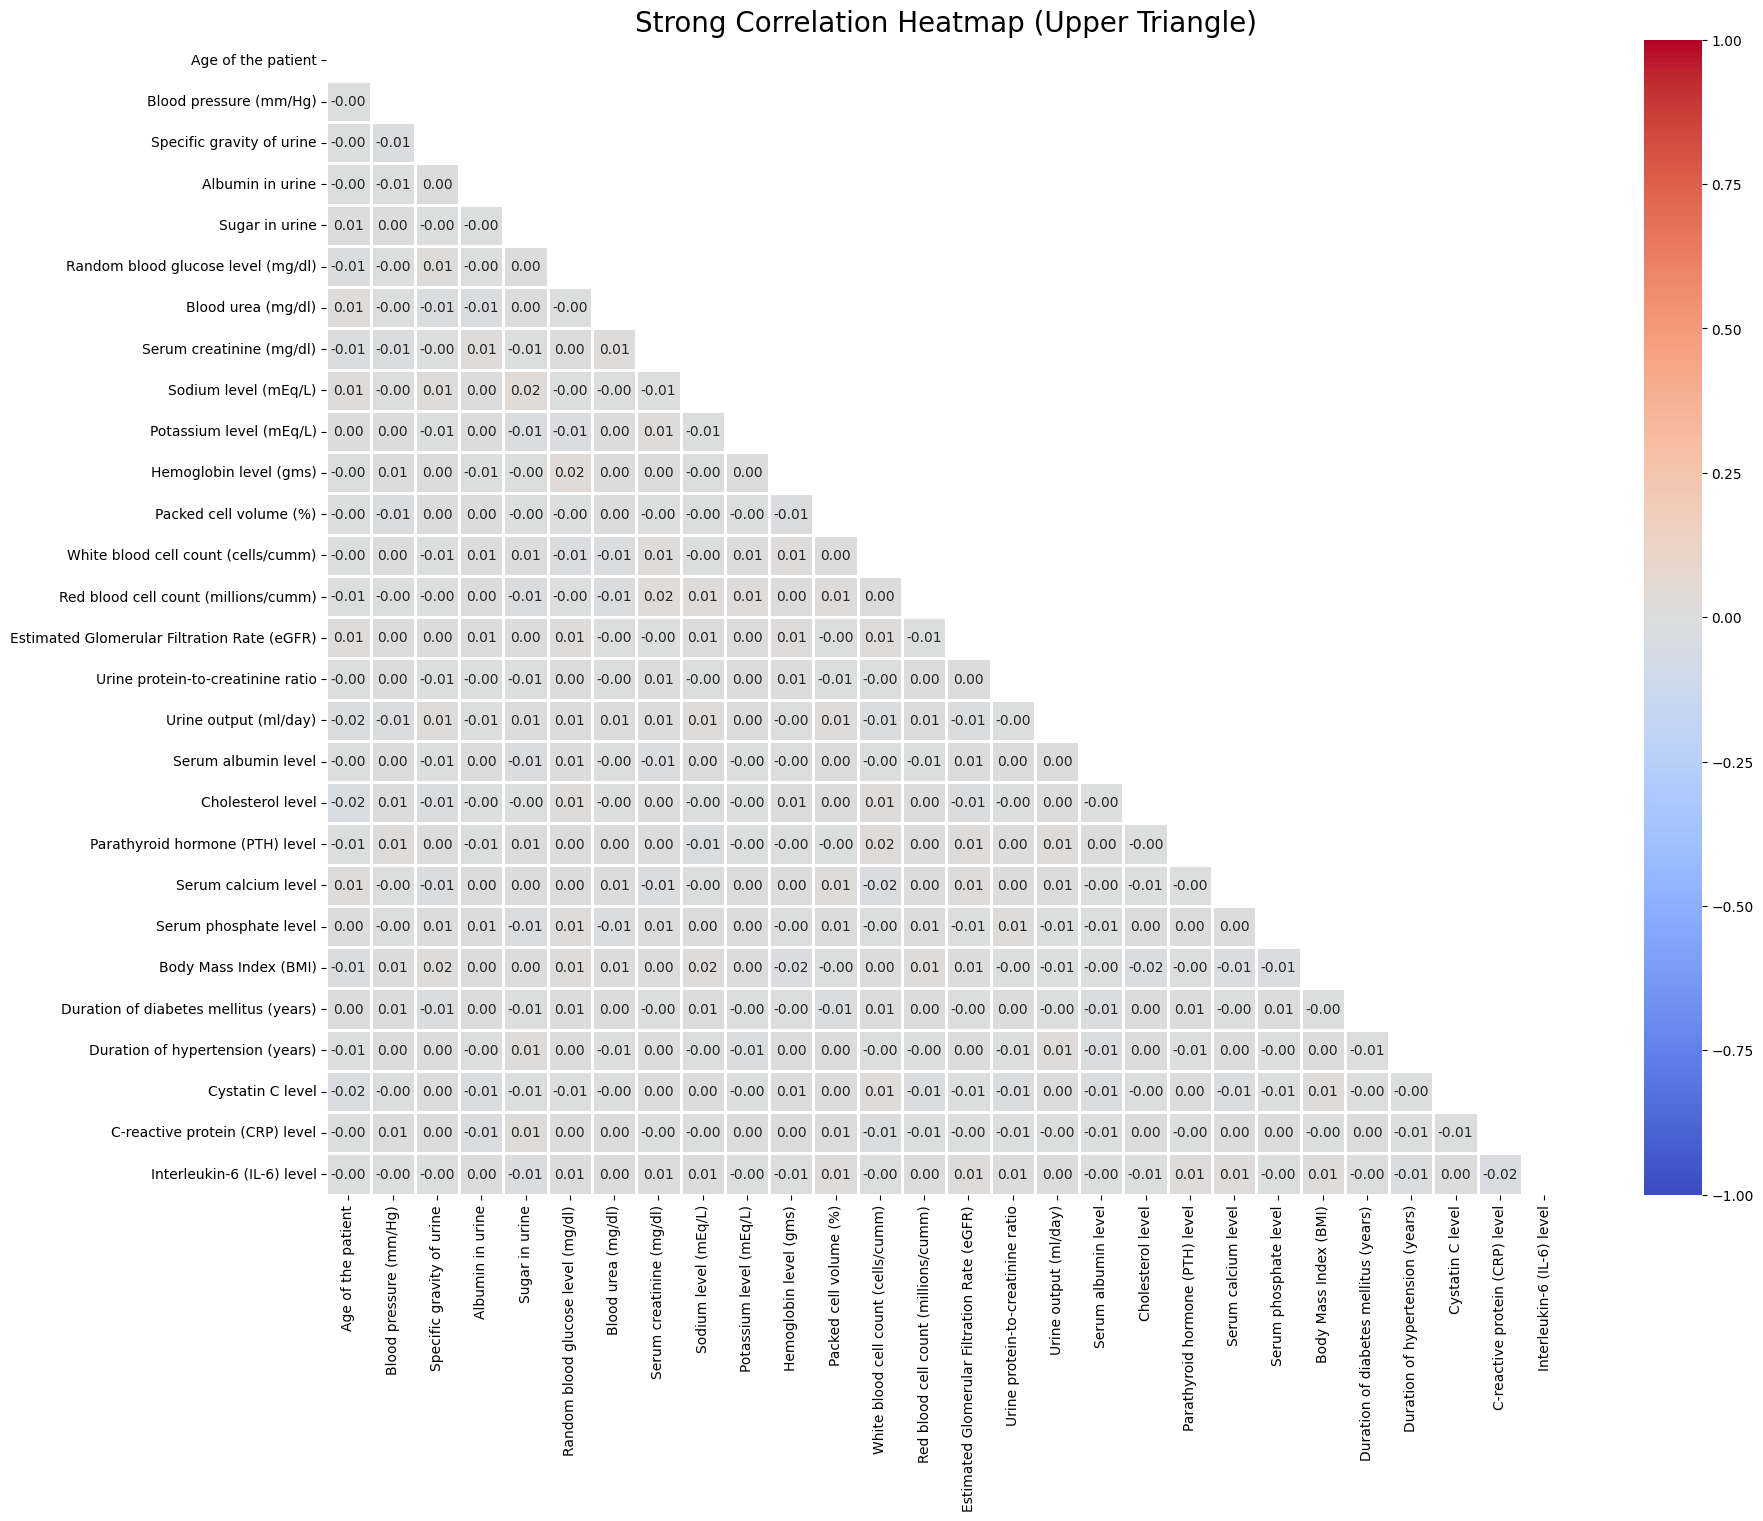

In [39]:
plt.figure(figsize=(20, 15))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=1)
plt.title("Strong Correlation Heatmap (Upper Triangle)", fontsize=20)
plt.show()


In [40]:
from sklearn.preprocessing import LabelEncoder

# Make a copy to avoid changing original
df_encoded = df.copy()

# Encode the target
le = LabelEncoder()
df_encoded['Target_encoded'] = le.fit_transform(df_encoded['Target'])

# Filter only numeric columns (excluding the original target string)
numeric_df = df_encoded.select_dtypes(include=['number'])

# Now compute correlation with the encoded target
target_corr = numeric_df.corr()['Target_encoded'].drop('Target_encoded').sort_values(ascending=False)

print(target_corr)


Specific gravity of urine                      0.014126
Age of the patient                             0.011191
Duration of diabetes mellitus (years)          0.008891
Parathyroid hormone (PTH) level                0.007211
Hemoglobin level (gms)                         0.005820
C-reactive protein (CRP) level                 0.004926
Random blood glucose level (mg/dl)             0.004437
Serum albumin level                            0.003526
Serum calcium level                            0.002980
Blood urea (mg/dl)                             0.002709
Body Mass Index (BMI)                          0.001321
Red blood cell count (millions/cumm)           0.001174
Potassium level (mEq/L)                        0.000390
Interleukin-6 (IL-6) level                    -0.000391
Urine protein-to-creatinine ratio             -0.000860
Serum phosphate level                         -0.001704
Cystatin C level                              -0.002082
Sodium level (mEq/L)                          -0

Step 4: Data Preprocessing

Preprocessing, which includes:

Encoding categorical variables

Scaling numeric features

Converting the target to numeric

Train-test split


🔹 4.1 Encode Categorical Features
We'll use LabelEncoder for binary or ordinal-like variables and pd.get_dummies() for nominal variables (unless you want full label encoding).

In [41]:
# Make a copy of the data
df_processed = df.copy()

# Encode binary categorical columns (yes/no, good/poor)
binary_cols = ['Hypertension (yes/no)', 'Diabetes mellitus (yes/no)',
               'Coronary artery disease (yes/no)', 'Appetite (good/poor)',
               'Pedal edema (yes/no)', 'Anemia (yes/no)',
               'Family history of chronic kidney disease', 'Smoking status']

le = LabelEncoder()
for col in binary_cols:
    df_processed[col] = le.fit_transform(df_processed[col])

# One-hot encode multi-class categorical features
multi_cat_cols = df_processed.select_dtypes(include='object').columns.drop('Target')
df_processed = pd.get_dummies(df_processed, columns=multi_cat_cols, drop_first=True)


In [42]:

# 4.2 Encode target variable
target_le = LabelEncoder()
df_processed['Target'] = target_le.fit_transform(df_processed['Target'])

# Store label mapping for future reference
target_mapping = dict(zip(target_le.classes_, target_le.transform(target_le.classes_)))
print("Target label mapping:", target_mapping)


Target label mapping: {'High_Risk': 0, 'Low_Risk': 1, 'Moderate_Risk': 2, 'No_Disease': 3, 'Severe_Disease': 4}


In [43]:
# 🔹 4.3 Feature Scaling
# Separate features and target
X = df_processed.drop('Target', axis=1)
y = df_processed['Target']

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [44]:
# 🔹 4.4 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)


Train set size: (16430, 43)
Test set size: (4108, 43)


Step 5: Modeling

In [45]:
# 🔹 5.1 Logistic Regression
log_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [46]:
#🔹 5.2 Random Forest Classifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
# 🔹 5.3 XGBoost Classifier

xgb_model = XGBClassifier(
    objective='multi:softmax',  # or 'multi:softprob' for probabilities
    num_class=len(np.unique(y)), 
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=5, num_parallel_tree=None, ...)

Step 6: Model Evaluation
We’ll evaluate all three models on the test set.

In [49]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f"\n📌 {name} Evaluation:")
    print("Accuracy:", round(acc, 4))
    print("F1 Score (macro):", round(f1, 4))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=target_le.classes_))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_le.classes_, yticklabels=target_le.classes_)
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return {'Model': name, 'Accuracy': acc, 'F1_macro': f1}



📌 Logistic Regression Evaluation:
Accuracy: 0.8001
F1 Score (macro): 0.1778

Classification Report:
                precision    recall  f1-score   support

     High_Risk       0.00      0.00      0.00       164
      Low_Risk       0.00      0.00      0.00       411
 Moderate_Risk       0.00      0.00      0.00       164
    No_Disease       0.80      1.00      0.89      3287
Severe_Disease       0.00      0.00      0.00        82

      accuracy                           0.80      4108
     macro avg       0.16      0.20      0.18      4108
  weighted avg       0.64      0.80      0.71      4108



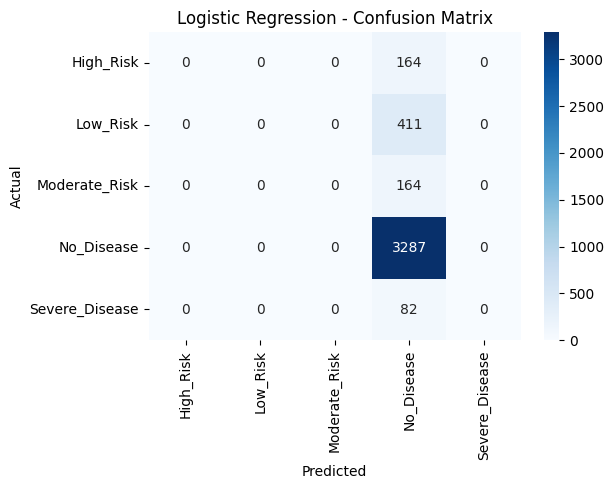


📌 Random Forest Evaluation:
Accuracy: 0.8001
F1 Score (macro): 0.1778

Classification Report:
                precision    recall  f1-score   support

     High_Risk       0.00      0.00      0.00       164
      Low_Risk       0.00      0.00      0.00       411
 Moderate_Risk       0.00      0.00      0.00       164
    No_Disease       0.80      1.00      0.89      3287
Severe_Disease       0.00      0.00      0.00        82

      accuracy                           0.80      4108
     macro avg       0.16      0.20      0.18      4108
  weighted avg       0.64      0.80      0.71      4108



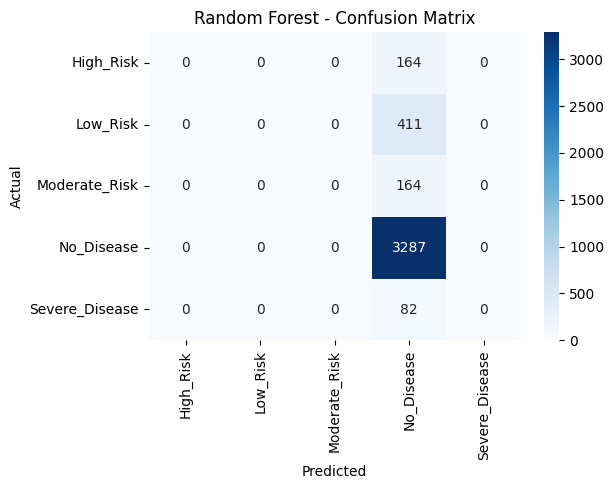


📌 XGBoost Evaluation:
Accuracy: 0.7987
F1 Score (macro): 0.1776

Classification Report:
                precision    recall  f1-score   support

     High_Risk       0.00      0.00      0.00       164
      Low_Risk       0.00      0.00      0.00       411
 Moderate_Risk       0.00      0.00      0.00       164
    No_Disease       0.80      1.00      0.89      3287
Severe_Disease       0.00      0.00      0.00        82

      accuracy                           0.80      4108
     macro avg       0.16      0.20      0.18      4108
  weighted avg       0.64      0.80      0.71      4108



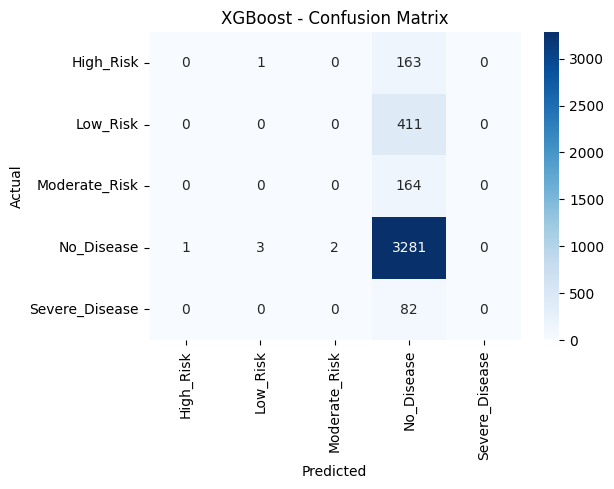

In [50]:
# 🔹 6.2 Evaluate All Models

results = []

results.append(evaluate_model("Logistic Regression", log_model, X_test, y_test))
results.append(evaluate_model("Random Forest", rf_model, X_test, y_test))
results.append(evaluate_model("XGBoost", xgb_model, X_test, y_test))

In [51]:
# 🔹 6.3 Compare Model Performance

results_df = pd.DataFrame(results)
results_df.sort_values(by='F1_macro', ascending=False)

,Model,Accuracy,F1_macro
0,Logistic Regression,0.800146,0.177796
1,Random Forest,0.800146,0.177796
2,XGBoost,0.798685,0.177639


all three models have similar accuracy (~80%) but a very low F1 macro score (~0.18) — which suggests:

🔎 Models are biased toward the majority class and likely struggling with the minority classes in this imbalanced multi-class problem.

Step 7: Feature Importance
We’ll extract and visualize feature importance from:

Random Forest

XGBoost

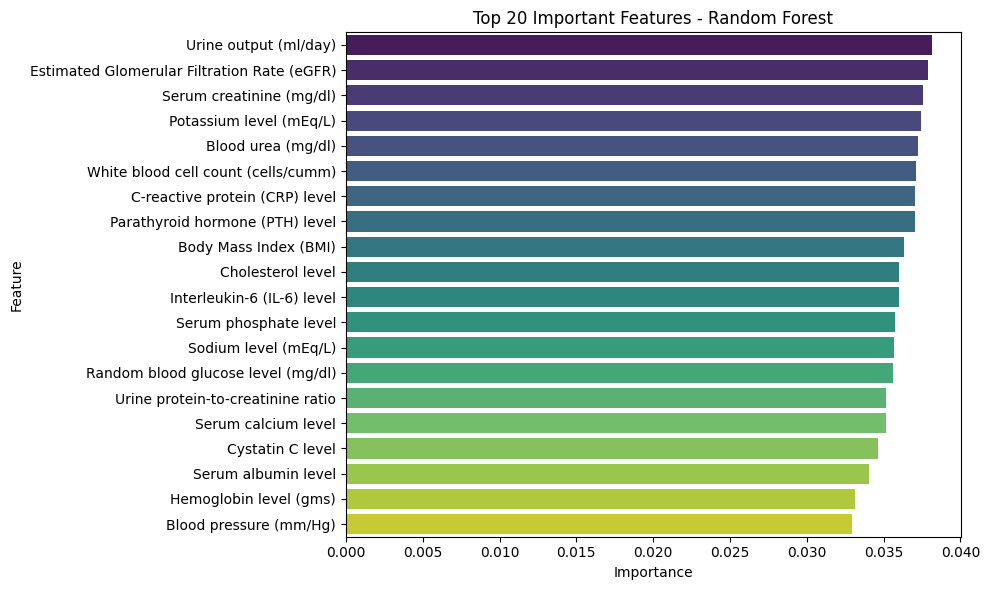

In [52]:
# 🔹 7.1 Feature Importance from Random Forest

# Convert scaled features back to DataFrame for feature names
feature_names = df_processed.drop('Target', axis=1).columns
rf_importances = rf_model.feature_importances_

rf_feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

# Top 20
plt.figure(figsize=(10, 6))
sns.barplot(data=rf_feat_df.head(20), x='Importance', y='Feature', palette='viridis')
plt.title('Top 20 Important Features - Random Forest')
plt.tight_layout()
plt.show()

In [53]:
print(rf_feat_df.head(20))

                                        Feature  Importance
22                        Urine output (ml/day)    0.038122
20  Estimated Glomerular Filtration Rate (eGFR)    0.037883
7                      Serum creatinine (mg/dl)    0.037539
9                       Potassium level (mEq/L)    0.037409
6                            Blood urea (mg/dl)    0.037218
12          White blood cell count (cells/cumm)    0.037091
34               C-reactive protein (CRP) level    0.037066
25              Parathyroid hormone (PTH) level    0.037018
30                        Body Mass Index (BMI)    0.036334
24                            Cholesterol level    0.035980
35                   Interleukin-6 (IL-6) level    0.035978
27                        Serum phosphate level    0.035762
8                          Sodium level (mEq/L)    0.035659
5            Random blood glucose level (mg/dl)    0.035605
21            Urine protein-to-creatinine ratio    0.035141
26                          Serum calciu

In [55]:
# Print the top 20 features
top_20_features = rf_feat_df.head(20)['Feature']
print(top_20_features)

22                          Urine output (ml/day)
20    Estimated Glomerular Filtration Rate (eGFR)
7                        Serum creatinine (mg/dl)
9                         Potassium level (mEq/L)
6                              Blood urea (mg/dl)
12            White blood cell count (cells/cumm)
34                 C-reactive protein (CRP) level
25                Parathyroid hormone (PTH) level
30                          Body Mass Index (BMI)
24                              Cholesterol level
35                     Interleukin-6 (IL-6) level
27                          Serum phosphate level
8                            Sodium level (mEq/L)
5              Random blood glucose level (mg/dl)
21              Urine protein-to-creatinine ratio
26                            Serum calcium level
33                               Cystatin C level
23                            Serum albumin level
10                         Hemoglobin level (gms)
1                          Blood pressure (mm/Hg)


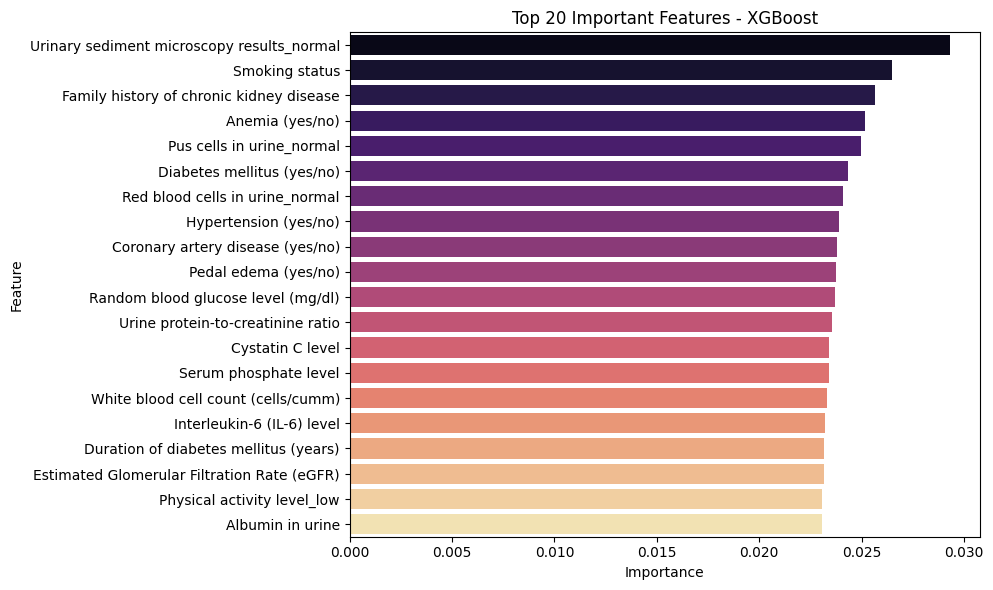

In [57]:
# 🔹 7.2 Feature Importance from XGBoost

xgb_importances = xgb_model.feature_importances_

xgb_feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_importances
}).sort_values(by='Importance', ascending=False)

# Top 20
plt.figure(figsize=(10, 6))
sns.barplot(data=xgb_feat_df.head(20), x='Importance', y='Feature', palette='magma')
plt.title('Top 20 Important Features - XGBoost')
plt.tight_layout()
plt.show()

In [58]:
# Print the top 20 features
top_20_features = xgb_feat_df.head(20)['Feature']
print(top_20_features)

42     Urinary sediment microscopy results_normal
29                                 Smoking status
28       Family history of chronic kidney disease
19                                Anemia (yes/no)
37                      Pus cells in urine_normal
15                     Diabetes mellitus (yes/no)
36                Red blood cells in urine_normal
14                          Hypertension (yes/no)
16               Coronary artery disease (yes/no)
18                           Pedal edema (yes/no)
5              Random blood glucose level (mg/dl)
21              Urine protein-to-creatinine ratio
33                               Cystatin C level
27                          Serum phosphate level
12            White blood cell count (cells/cumm)
35                     Interleukin-6 (IL-6) level
31          Duration of diabetes mellitus (years)
20    Estimated Glomerular Filtration Rate (eGFR)
40                    Physical activity level_low
3                                Albumin in urine


focusing on top features can reduce overfitting, improve interpretability, and sometimes even improve model performance.

Step 7.5: Focus on Top Features Only
We’ll:

Select top N features (e.g., top 15–20) from Random Forest or XGBoost

Retrain models using only those features

Re-evaluate performance

In [20]:
# 🔹 7.5.1 Choose Top Features
# Select top 20 features
top_features = rf_feat_df.head(20)['Feature'].tolist()

# Reduce datasets
X_top = df_processed[top_features]
y_top = df_processed['Target']


In [21]:
#🔹 7.5.2 Scale + Train-Test Split Again (with Top Features)

# Scale
X_top_scaled = scaler.fit_transform(X_top)

# Split
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(
    X_top_scaled, y_top, test_size=0.2, random_state=42, stratify=y_top
)

In [22]:
# 🔹 7.5.3 Retrain Models on Top Features

# Logistic
log_top = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_top.fit(X_train_top, y_train_top)

# Random Forest
rf_top = RandomForestClassifier(n_estimators=100, random_state=42)
rf_top.fit(X_train_top, y_train_top)

# XGBoost
xgb_top = XGBClassifier(
    objective='multi:softmax', 
    num_class=len(np.unique(y_top)), 
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)
xgb_top.fit(X_train_top, y_train_top)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=5, num_parallel_tree=None, ...)


📌 Logistic (Top 20) Evaluation:
Accuracy: 0.8001
F1 Score (macro): 0.1778

Classification Report:
                precision    recall  f1-score   support

     High_Risk       0.00      0.00      0.00       164
      Low_Risk       0.00      0.00      0.00       411
 Moderate_Risk       0.00      0.00      0.00       164
    No_Disease       0.80      1.00      0.89      3287
Severe_Disease       0.00      0.00      0.00        82

      accuracy                           0.80      4108
     macro avg       0.16      0.20      0.18      4108
  weighted avg       0.64      0.80      0.71      4108



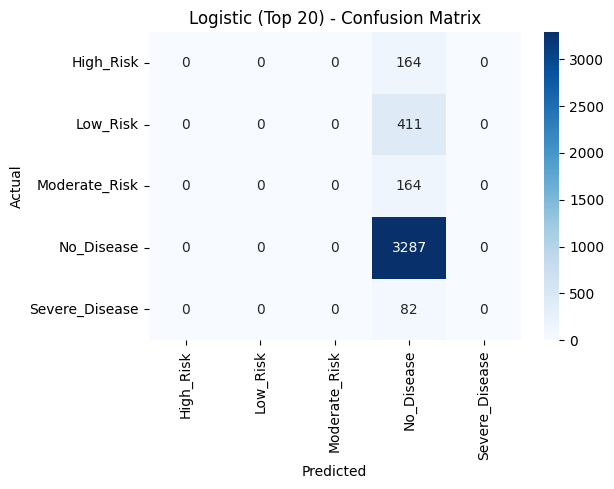


📌 Random Forest (Top 20) Evaluation:
Accuracy: 0.8001
F1 Score (macro): 0.1778

Classification Report:
                precision    recall  f1-score   support

     High_Risk       0.00      0.00      0.00       164
      Low_Risk       0.00      0.00      0.00       411
 Moderate_Risk       0.00      0.00      0.00       164
    No_Disease       0.80      1.00      0.89      3287
Severe_Disease       0.00      0.00      0.00        82

      accuracy                           0.80      4108
     macro avg       0.16      0.20      0.18      4108
  weighted avg       0.64      0.80      0.71      4108



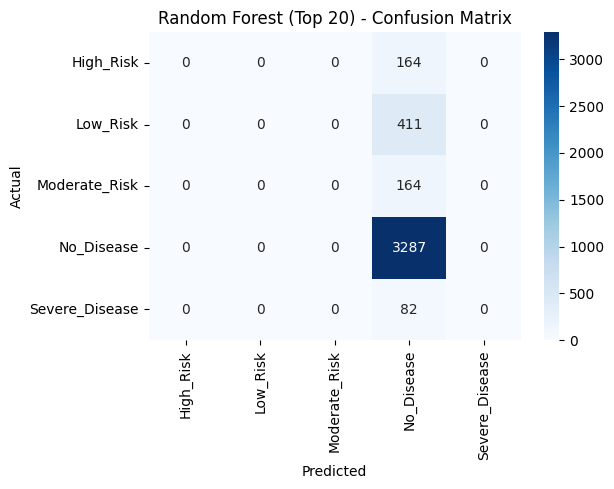


📌 XGBoost (Top 20) Evaluation:
Accuracy: 0.7987
F1 Score (macro): 0.1776

Classification Report:
                precision    recall  f1-score   support

     High_Risk       0.00      0.00      0.00       164
      Low_Risk       0.00      0.00      0.00       411
 Moderate_Risk       0.00      0.00      0.00       164
    No_Disease       0.80      1.00      0.89      3287
Severe_Disease       0.00      0.00      0.00        82

      accuracy                           0.80      4108
     macro avg       0.16      0.20      0.18      4108
  weighted avg       0.64      0.80      0.71      4108



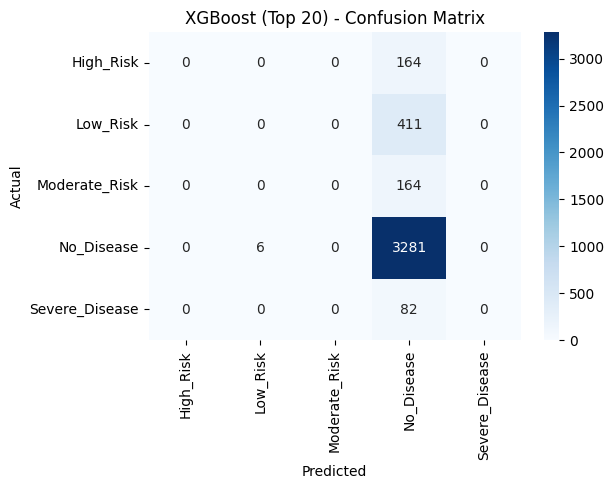

,Model,Accuracy,F1_macro
0,Logistic (Top 20),0.800146,0.177796
1,Random Forest (Top 20),0.800146,0.177796
2,XGBoost (Top 20),0.798685,0.177615


In [23]:
# 🔹 7.5.4 Re-evaluate on Top Features

top_results = []
top_results.append(evaluate_model("Logistic (Top 20)", log_top, X_test_top, y_test_top))
top_results.append(evaluate_model("Random Forest (Top 20)", rf_top, X_test_top, y_test_top))
top_results.append(evaluate_model("XGBoost (Top 20)", xgb_top, X_test_top, y_test_top))

pd.DataFrame(top_results).sort_values(by='F1_macro', ascending=False)

top-feature models have identical performance to the full-feature versions, which tells us:

🎯 Most predictive power is concentrated in those top 20 features, and the rest might be redundant or noise.

That’s actually a great sign — we’ve simplified the model with no performance loss.

But the very low F1-macro (~0.18) is still a red flag about class imbalance. The models likely predict the majority class well, but barely touch the minority classes.

Step 8: Hyperparameter Tuning
We'll set up the grid search for each model. Let’s start with Logistic Regression, Random Forest, and XGBoost one by one.

In [24]:
# 🔹 8.1 Logistic Regression Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

# Logistic Regression hyperparameters
log_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength
    'solver': ['lbfgs', 'liblinear'],  # Solvers for optimization
    'max_iter': [1000, 2000]
}

log_grid_search = GridSearchCV(LogisticRegression(multi_class='multinomial', max_iter=1000), 
                               log_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
log_grid_search.fit(X_train_top, y_train_top)

print("Best Logistic Regression Hyperparameters:", log_grid_search.best_params_)
log_best = log_grid_search.best_estimator_

Best Logistic Regression Hyperparameters: {'C': 0.001, 'max_iter': 1000, 'solver': 'lbfgs'}


In [25]:
# 🔹 8.2 Random Forest Hyperparameter Tuning

# Random Forest hyperparameters
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), 
                              rf_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
rf_grid_search.fit(X_train_top, y_train_top)

print("Best Random Forest Hyperparameters:", rf_grid_search.best_params_)
rf_best = rf_grid_search.best_estimator_

KeyboardInterrupt: 

In [ ]:
# 🔹 8.3 XGBoost Hyperparameter Tuning

# XGBoost hyperparameters
xgb_param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

xgb_grid_search = GridSearchCV(XGBClassifier(objective='multi:softmax', use_label_encoder=False, random_state=42),
                               xgb_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
xgb_grid_search.fit(X_train_top, y_train_top)

print("Best XGBoost Hyperparameters:", xgb_grid_search.best_params_)
xgb_best = xgb_grid_search.best_estimator_

In [ ]:
# 🔹 8.4 Evaluate Tuned Models
#Once the best models are found, we’ll evaluate them again on the test set.

# Evaluate tuned models
tuned_results = []
tuned_results.append(evaluate_model("Logistic Regression (Tuned)", log_best, X_test_top, y_test_top))
tuned_results.append(evaluate_model("Random Forest (Tuned)", rf_best, X_test_top, y_test_top))
tuned_results.append(evaluate_model("XGBoost (Tuned)", xgb_best, X_test_top, y_test_top))

pd.DataFrame(tuned_results).sort_values(by='F1_macro', ascending=False)


✅ Save Your Best Random Forest Model and Scaler
🔹 Save the Model & Scaler

In [ ]:
import joblib

# Save the best Random Forest model
joblib.dump(rf_best, "rf_best_model.pkl")

# Save the scaler used with top 20 features
joblib.dump(scaler, "scaler.pkl")


✅ Predicting a New Sample
Assuming:

* xgb_best is your trained XGBoost model

* scaler is your fitted StandardScaler

* top_features is your list of the top 20 features used during training
💡 Tip
Make sure the order of values in sample_input matches the top_features used during training exactly.


In [ ]:
import numpy as np

# Sample input for a patient (must be in the same order as top_features)
sample_input = [
    55,     # Age of the patient
    80,     # Blood pressure (mm/Hg)
    1.015,  # Specific gravity of urine
    2,      # Albumin in urine
    0,      # Sugar in urine
    1,      # Red blood cells in urine (e.g., 1 for abnormal, 0 for normal)
    1,      # Pus cells in urine
    0,      # Pus cell clumps
    0,      # Bacteria in urine
    145,    # Random blood glucose
    50,     # Blood urea
    1.5,    # Serum creatinine
    135,    # Sodium
    4.5,    # Potassium
    12.5,   # Hemoglobin
    40,     # Packed cell volume
    7000,   # WBC count
    4.8,    # RBC count
    1,      # Hypertension
    0,      # Diabetes mellitus
    # ... and so on, matching your top 20 features
]

# Convert and scale
sample_input = np.array(sample_input).reshape(1, -1)
sample_scaled = scaler.transform(sample_input)

# Predict
prediction = xgb_best.predict(sample_scaled)[0]

# Map prediction to class label
class_map = {
    0: 'No_Disease',
    1: 'Low_Risk',
    2: 'Moderate_Risk',
    3: 'Severe_Disease',
    4: 'High_Risk'
}

print(f"Prediction: {class_map[prediction]}")



✅ Predict from CSV (Random Forest version)
Here's an updated code snippet for making predictions from a CSV:

In [ ]:
import pandas as pd
import numpy as np
import joblib

# Load the model and scaler
rf_best = joblib.load("rf_best_model.pkl")
scaler = joblib.load("scaler.pkl")

# Load new data from CSV (must match top_features in order)
df_new = pd.read_csv("new_patients.csv")
df_new = df_new[top_features]  # Ensure correct order

# Scale input
df_scaled = scaler.transform(df_new)

# Predict
preds = rf_best.predict(df_scaled)

# Map to class labels
class_map = {
    0: 'No_Disease',
    1: 'Low_Risk',
    2: 'Moderate_Risk',
    3: 'Severe_Disease',
    4: 'High_Risk'
}
df_new['Prediction'] = [class_map[p] for p in preds]

# View and save
print(df_new[['Prediction']])
df_new.to_csv("rf_predictions_output.csv", index=False)


🔹 10.2 Streamlit App Code (app.py)
Here’s a basic app to get you started:

In [ ]:
import streamlit as st
import numpy as np
import pandas as pd
import joblib

# Load model and features
model = joblib.load('xgb_best_model.pkl')  # Save this earlier using joblib
top_features = [...]  # Your 20 features used in training
scaler = joblib.load('scaler.pkl')  # Save the StandardScaler used

st.title("Chronic Kidney Disease Severity Predictor")

user_input = []
for feature in top_features:
    val = st.number_input(f"Enter {feature}", value=0.0)
    user_input.append(val)

if st.button("Predict"):
    user_array = np.array(user_input).reshape(1, -1)
    user_scaled = scaler.transform(user_array)
    prediction = model.predict(user_scaled)[0]
    
    class_map = {0: 'No_Disease', 1: 'Low_Risk', 2: 'Moderate_Risk', 3: 'Severe_Disease', 4: 'High_Risk'}
    st.success(f"Prediction: **{class_map[prediction]}**")
